## Title - Predicting House sale Prices with Advanced Regression Techniques using Random Forest, XGBoost, and Gradient Boosting

- Author: [Muhammad Haroon ul Hasnain](https://www.kaggle.com/haroon669)
- Linkedin: [Muhammad Haroon ul Hasnain](https://www.linkedin.com/in/muhammad-haroon-ul-hasnain/)
- Github: [hasnain1669](https://github.com/hasnain1669)
- Kaggle: [haroon669](https://www.kaggle.com/haroon669)
- Twitter: [hasnain669](https://twitter.com/hasnain1669)\
`Date:` 29 Jan 2024\
`Dataset:` [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/)

This notebook is a comprehensive guide to predict house prices using advanced regression techniques. The dataset is taken from Kaggle competition [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/). The dataset contains 79 explanatory variables describing (almost) every aspect of residential homes. The goal is to predict the final price of each home.

### Dataset Description
### File descriptions
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
#### Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

##### Objective
It is required to predict the sales price for each house. For each Id in the test set, must predict the value of the SalePrice variable.

##### Metric
Submissions are assessed using the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs implies that errors in estimating expensive and cheap properties will have an equal impact on the outcome.)

In [370]:
# Import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy import stats
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [371]:
# import the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [372]:
# having a look at the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [373]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [374]:
# Dataset shape
print(f"This dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns in the dataset.")
print(f"This dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns in the dataset.")

This dataset has 1460 rows and 81 columns in the dataset.
This dataset has 1459 rows and 80 columns in the dataset.


In [375]:
# Dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

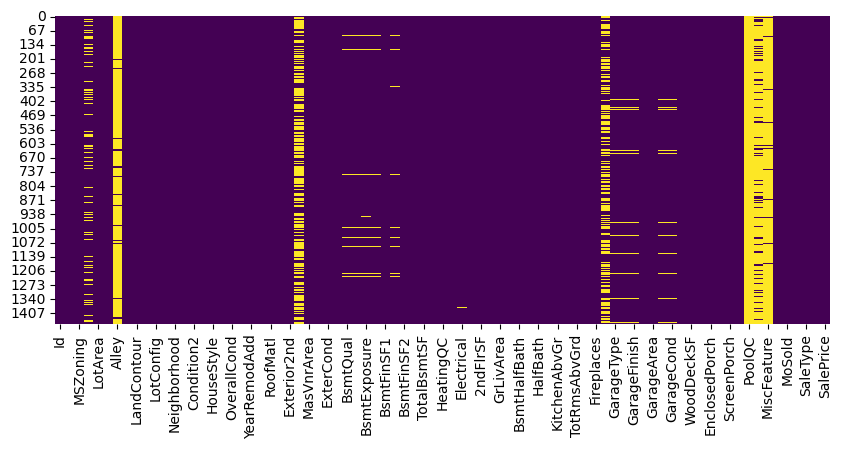

In [376]:
# heatmap to visualize the missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')

In [377]:
missing_data = df_train.isnull().sum() / len(df_train) * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


Let's make a table of the table with `dtype`,   `nunique`, `missing_values`, and `percentage of missing values`.

In [378]:
data = []
for col in df_train.columns:
    data.append([col, df_train[col].dtype,
                 df_train[col].nunique(),
                 df_train[col].isnull().sum(),
                 df_train[col].isnull().sum() / len(df_train) * 100])
    
data = pd.DataFrame(data, columns=['Column', 'dtype', 'Nunique', 'Missing_Values', 'Percentage'])
data = data.sort_values(by='Percentage', ascending=False)
data = data[data.Percentage > 0]
data

,Column,dtype,Nunique,Missing_Values,Percentage
72,PoolQC,object,3,1453,99.520548
74,MiscFeature,object,4,1406,96.301370
6,Alley,object,2,1369,93.767123
73,Fence,object,4,1179,80.753425
25,MasVnrType,object,3,872,59.726027
57,FireplaceQu,object,5,690,47.260274
3,LotFrontage,float64,110,259,17.739726
59,GarageYrBlt,float64,97,81,5.547945
64,GarageCond,object,5,81,5.547945
58,GarageType,object,6,81,5.547945


In [379]:
# Let's impute the missing values in the dataset, object type with 'None', int type with 0, and the electrical column with the mode value. 
data = df_train.isna().sum().reset_index().rename(columns={0: 'Missing_Values', 'index': 'Column'})
column_missing = list(data[data['Missing_Values'] > 0]['Column'])

In [380]:
# imputing the missing values
for col in column_missing:
    if col == 'Electrical':
        df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    elif df_train[col].dtype == 'object':
        df_train[col] = df_train[col].fillna('None')
    else:
        df_train[col] = df_train[col].fillna(0)

In [381]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

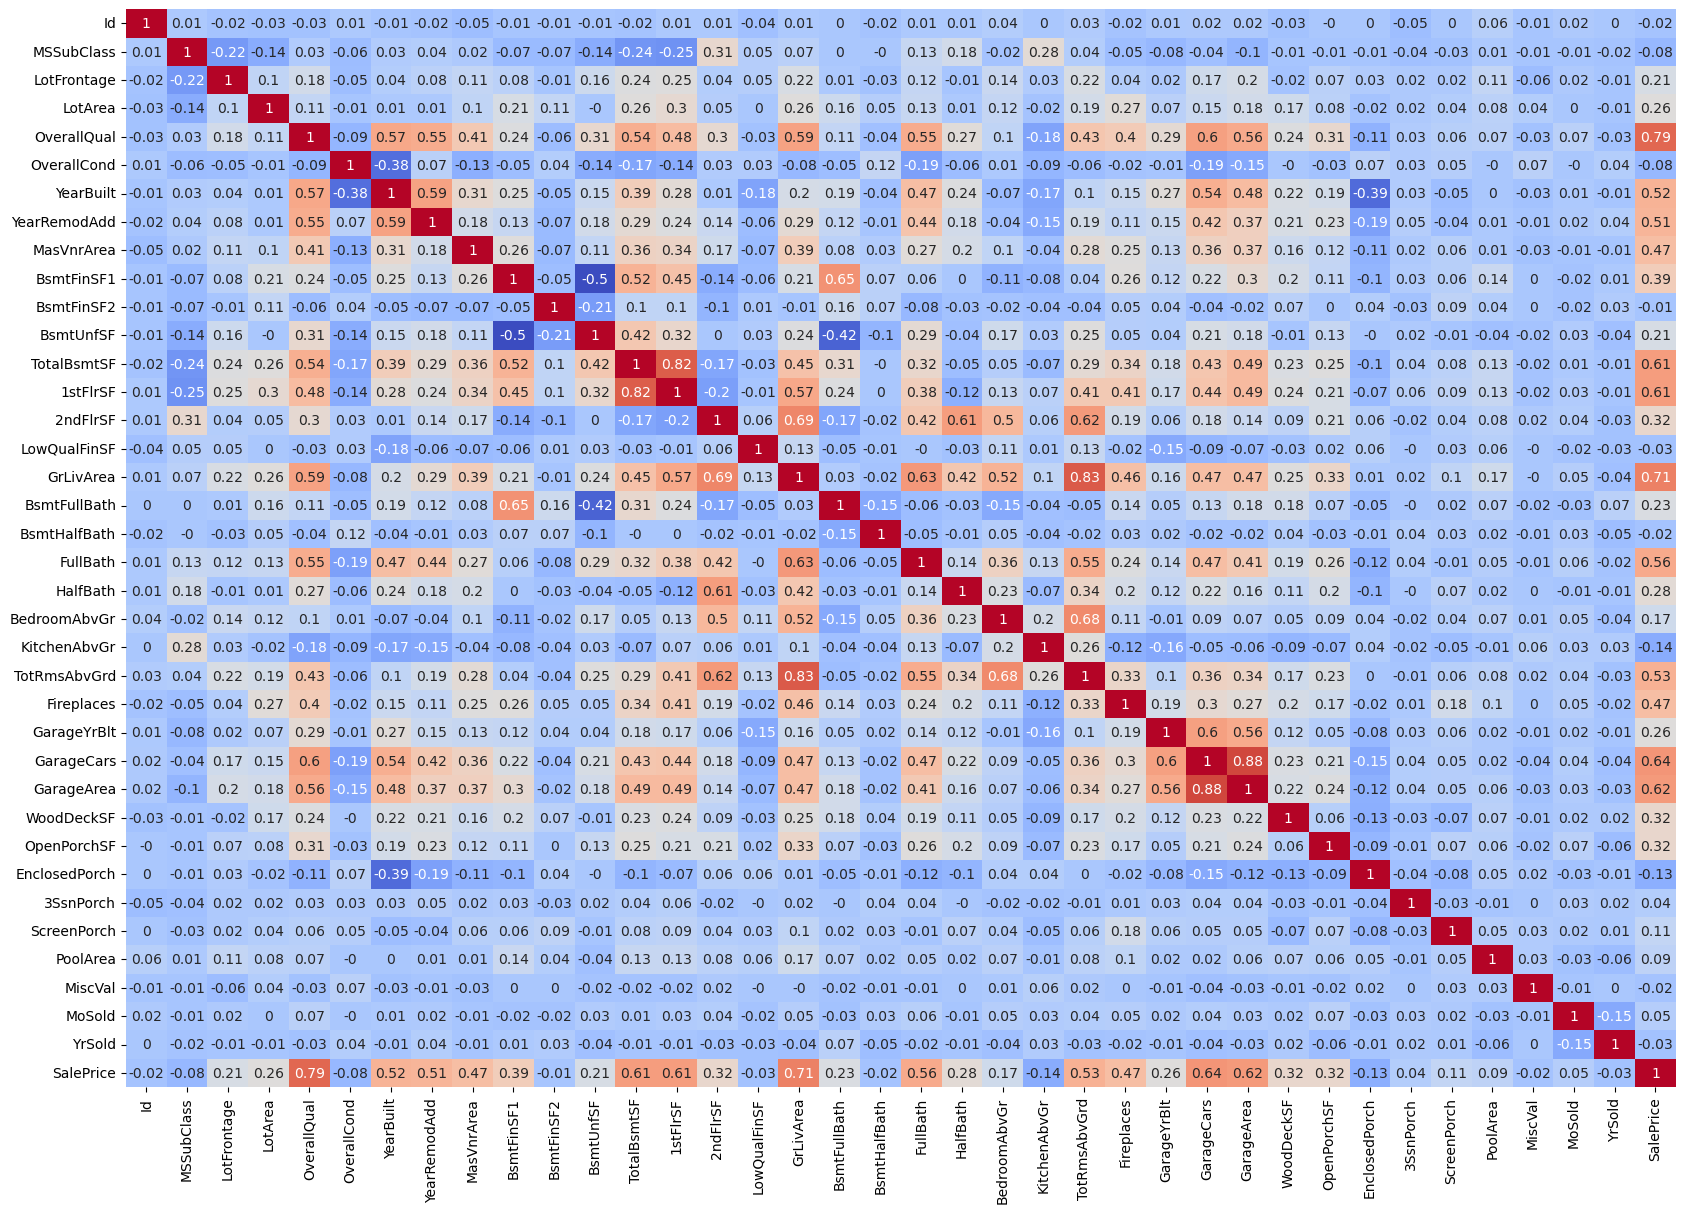

In [382]:
# checking the correlation of the dataset to see if multicollinearity exists
plt.figure(figsize=(20, 14))
# num_col = df_train[col].dtype == 'int64' or df_train[col].dtype == 'float64'
num_col = df_train.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_col.corr().round(2), annot=True, cmap='coolwarm', cbar=False)
plt.show()

Insights of the Correlation Matrix:
Overall Quality and Sale Price:

"OverallQual" (Overall Quality) has a strong positive correlation (approx. 0.79) with "SalePrice," indicating higher quality associates with higher sale prices.
Garage-related Features:

"GarageCars" and "GarageArea" have a high positive correlation (approx. 0.88), suggesting a larger garage is associated with more car capacity.
"GarageYrBlt" (Year garage was built) positively correlates (0.52) with "SalePrice."
Living Area and Rooms:

"GrLivArea" (Above ground living area) strongly correlates (0.71) with "SalePrice," suggesting larger living areas lead to higher sale prices.
"TotRmsAbvGrd" (Total rooms above ground) positively correlates(0.53) with "SalePrice."
Basement Features:

"TotalBsmtSF" (Total square feet of basement area) and "1stFlrSF" (First Floor square feet) highly positively correlate (0.82).
Year of Construction and Remodeling:

"YearBuilt" (Year house was built) positively correlates (0.52) with "SalePrice."
"YearRemodAdd" (Year of remodeling or addition) positively correlates (0.51) with "SalePrice."
Exterior Masonry Veneer Area:

"MasVnrArea" (Masonry Veneer Area) has a positive correlation (0.47) with "SalePrice."
Full Bath Features:

"FullBath" has a positve good correlation (0.56) with "SalePrice."
Miscellaneous Features:

"MiscVal"has low correlations with "SalePrice," suggesting these features may not strongly affect sale price.

Text(0.5, 0.98, 'Correlation between numerical features and Sales Price')

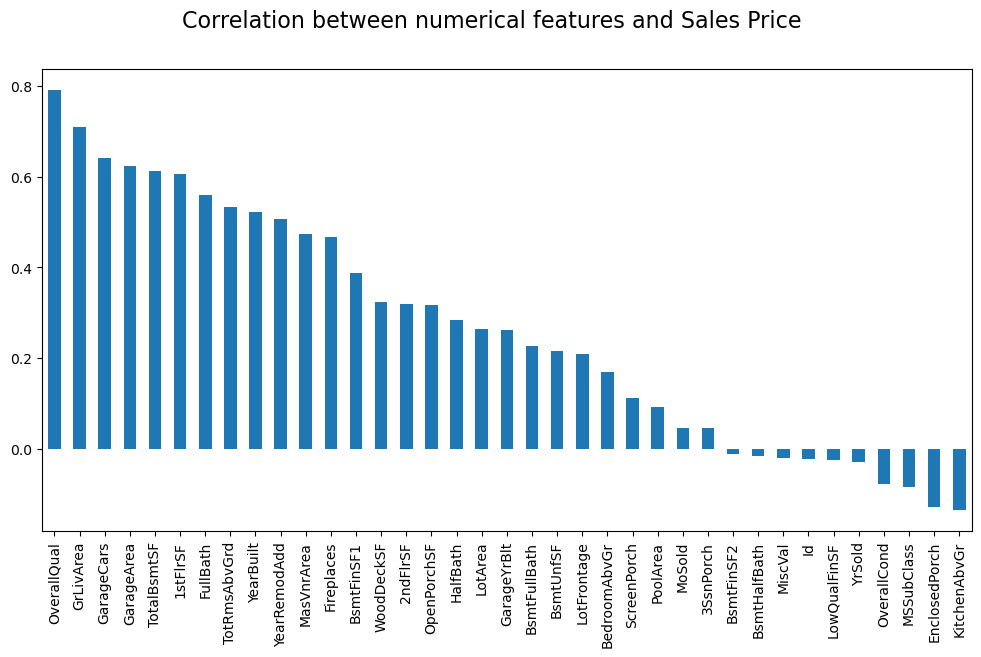

In [383]:
#Show Numerical features correlation with sales price
plt.figure(figsize=(12, 6))
df_train.select_dtypes(include=[np.number]).corr()['SalePrice'].sort_values(ascending = False).drop('SalePrice').plot(kind = 'bar')
plt.suptitle('Correlation between numerical features and Sales Price', fontsize=16)

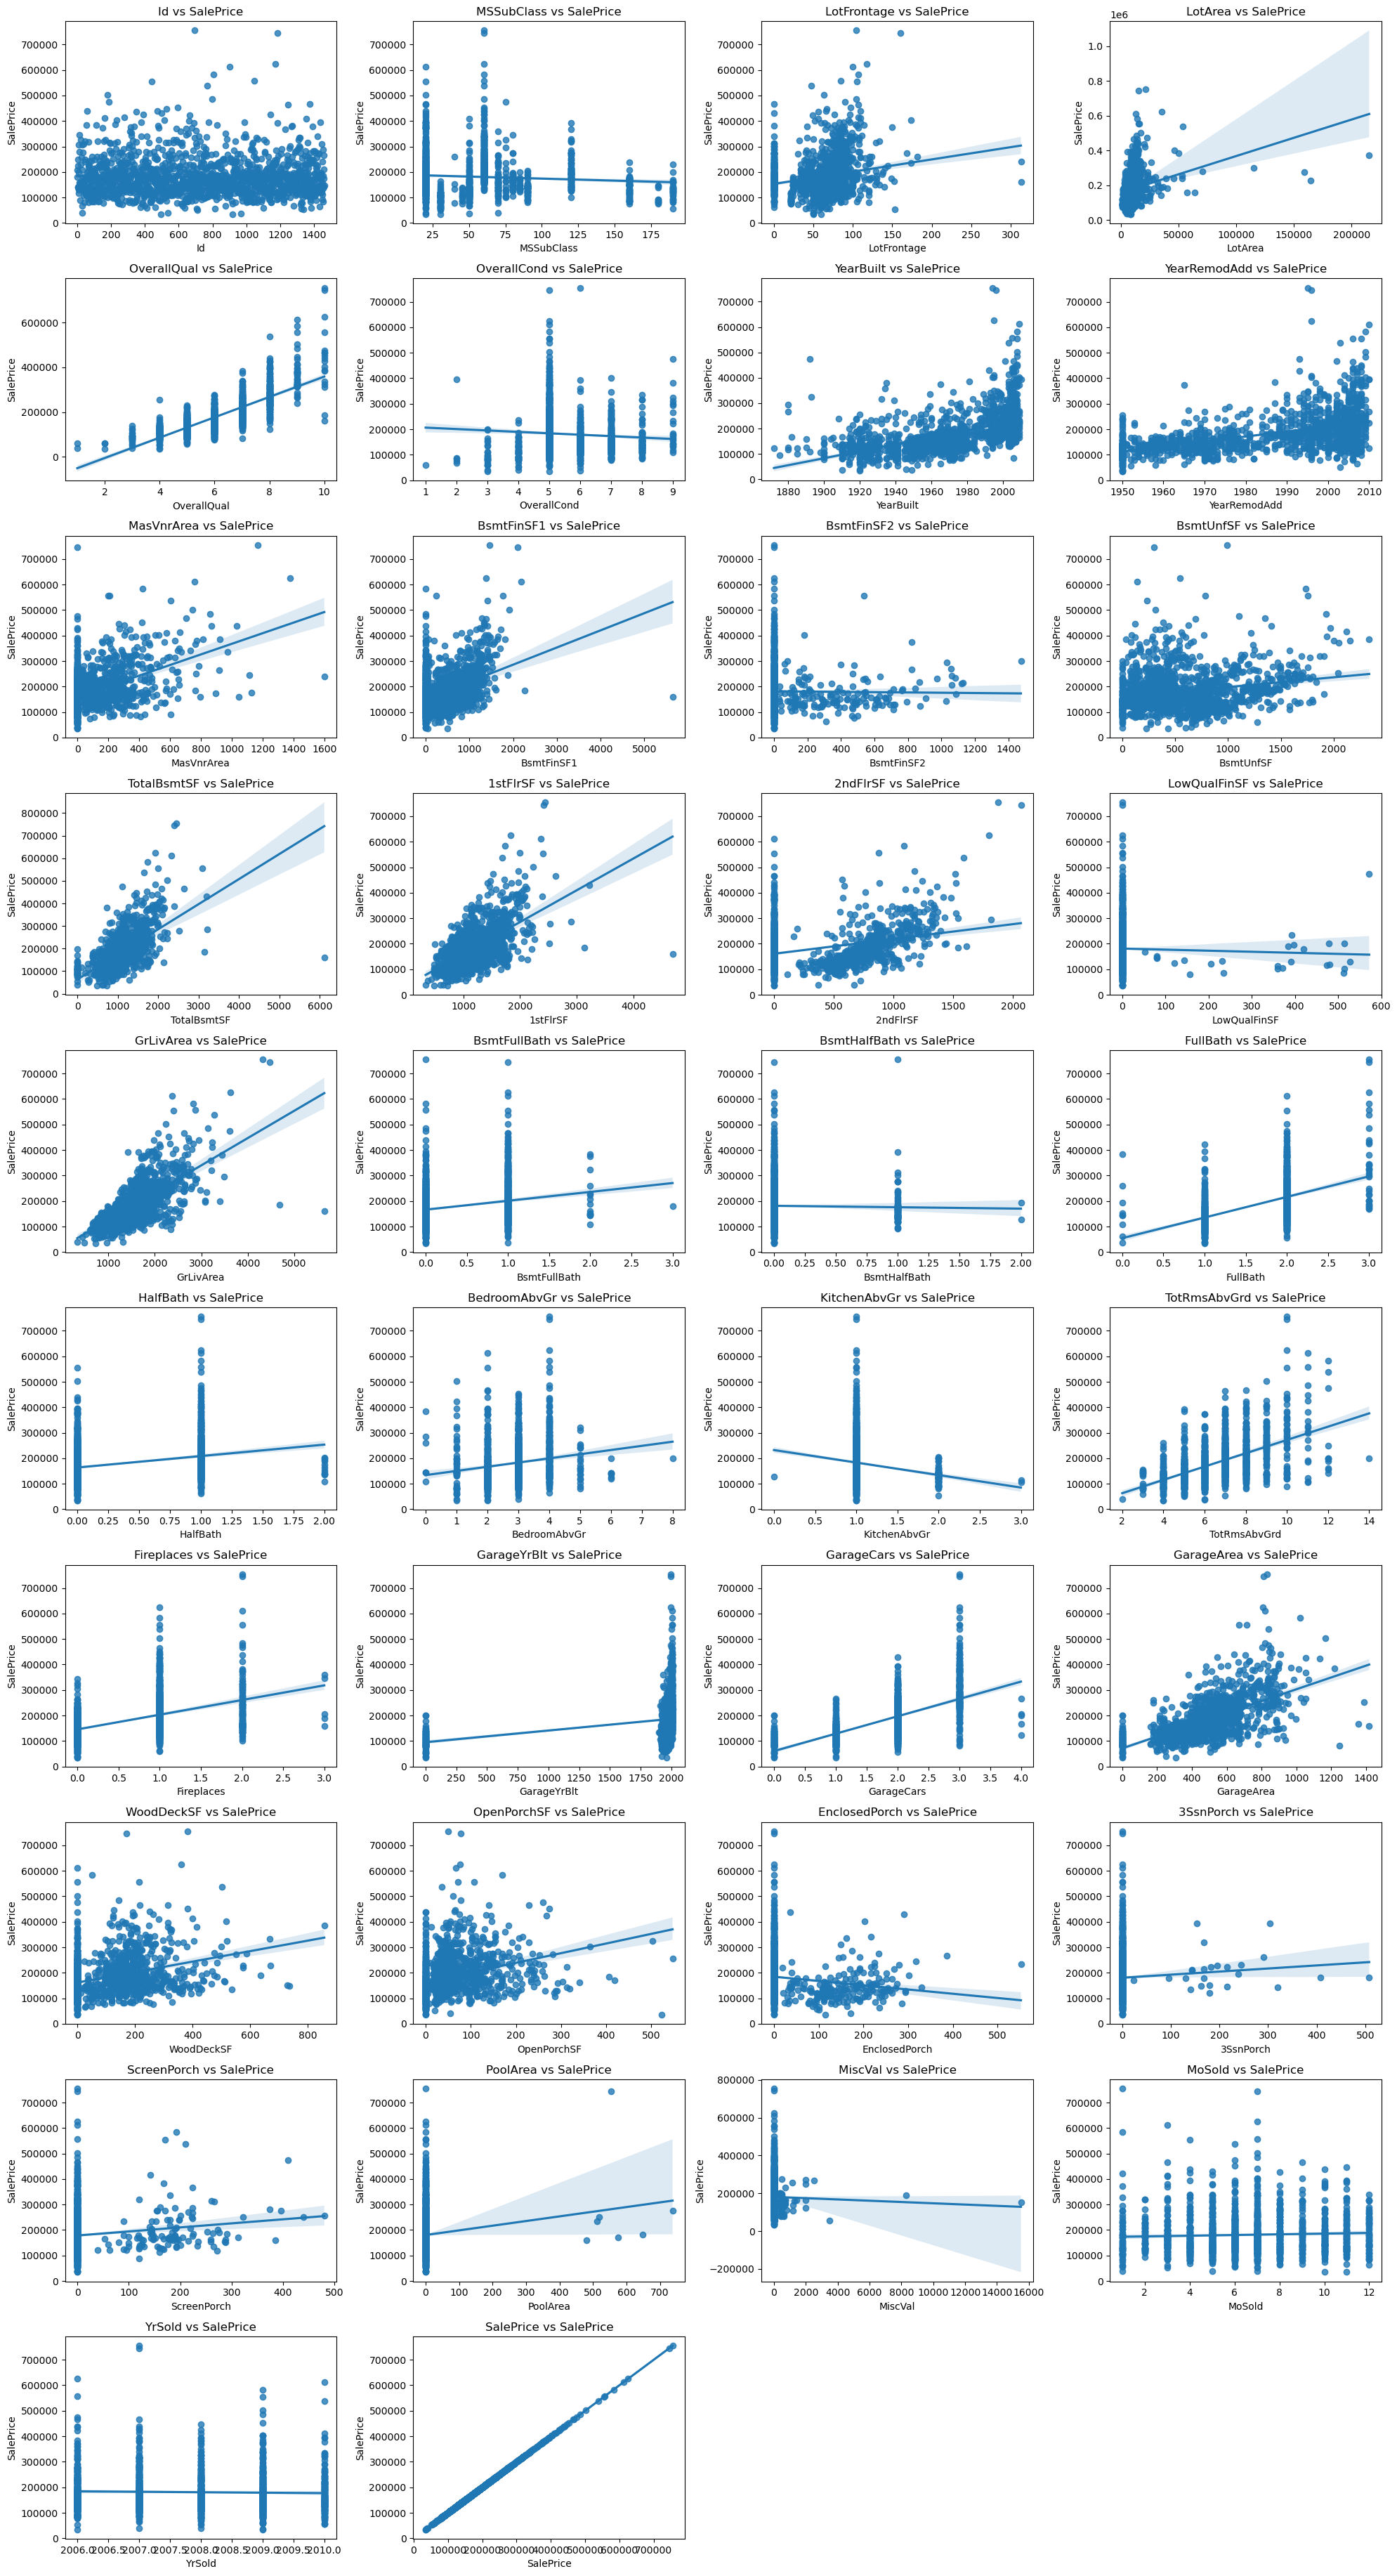

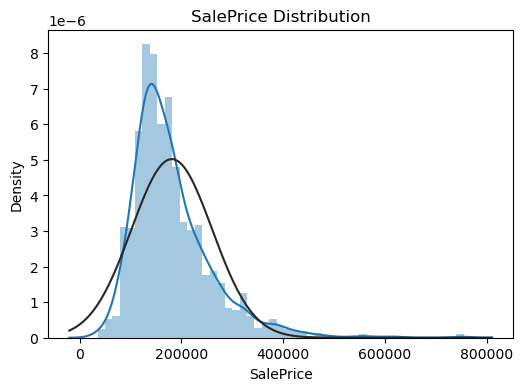

The skewness of the target variable is 1.8828757597682129
The kurtosis of the target variable is 6.536281860064529


In [384]:
# distribution of the num_cols with the target variable

plt.figure(figsize=(20, 40))
for i, col in enumerate(num_col.columns):
    plt.subplot(11, 4, i+1)
    sns.regplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()

# checking the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.distplot(df_train['SalePrice'], fit=stats.norm)
plt.title('SalePrice Distribution')
plt.show()

# checking the skewness and kurtosis of the target variable
print(f"The skewness of the target variable is {df_train['SalePrice'].skew()}")
print(f"The kurtosis of the target variable is {df_train['SalePrice'].kurt()}")
# The target variable is right skewed and has a high kurtosis value.

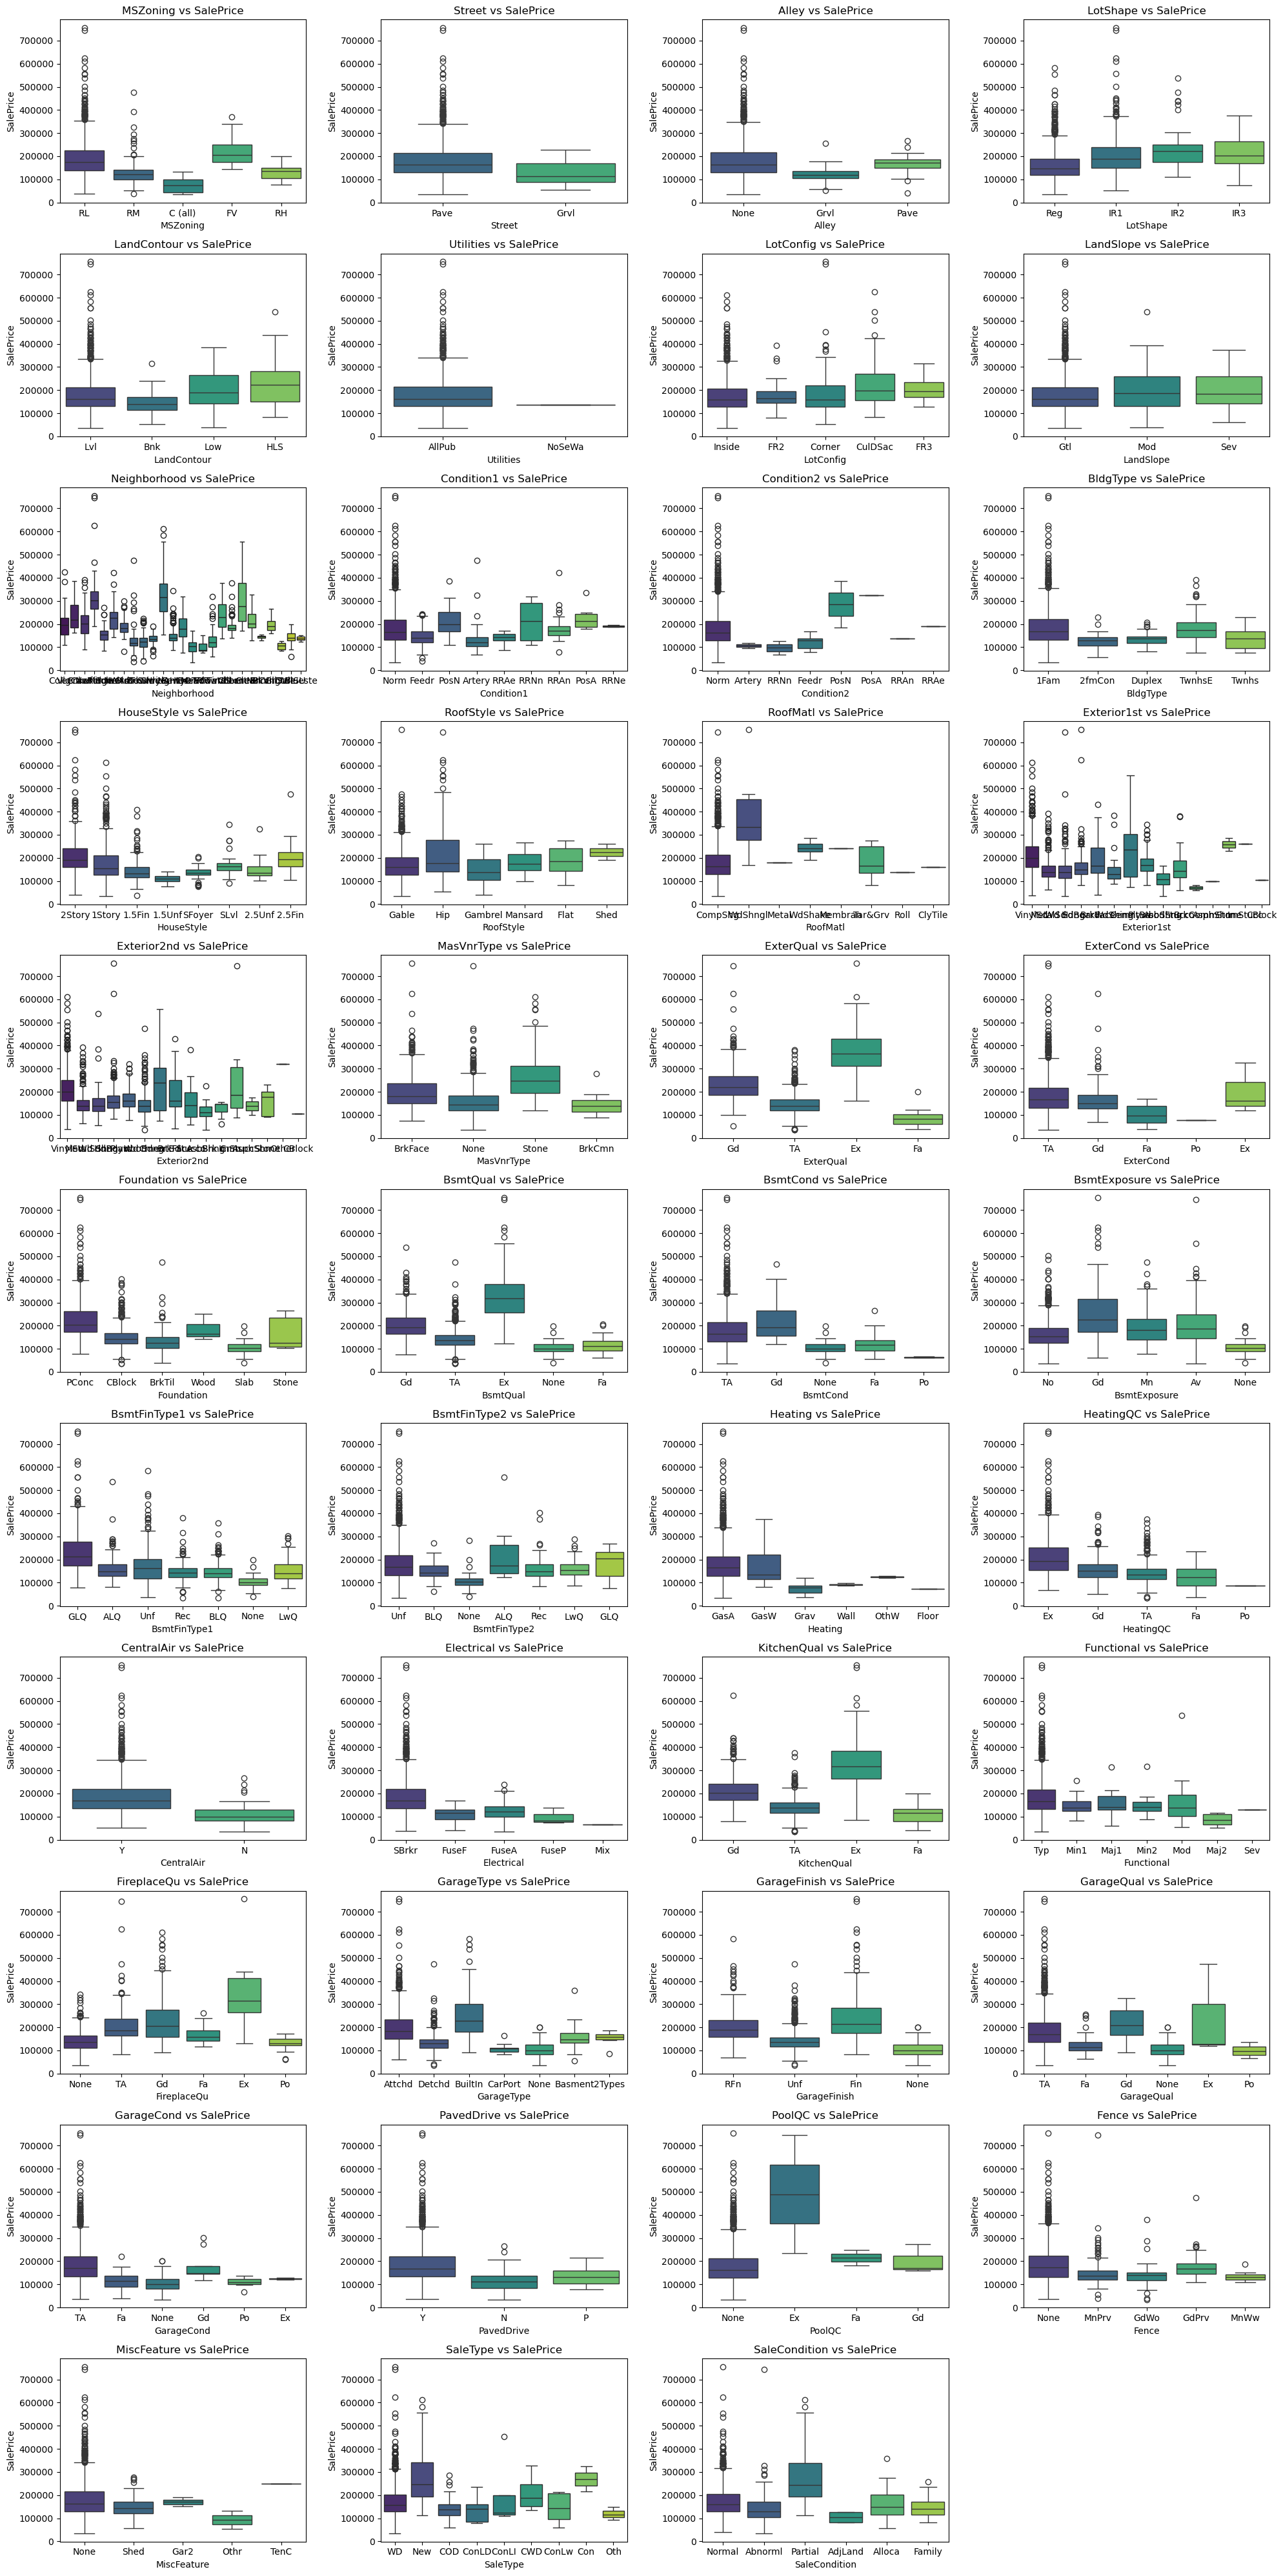

In [385]:
# Let's check the object columns distribution with the target variable through boxplot
cat_col = df_train.select_dtypes(include=['object'])
plt.figure(figsize=(20, 40))
for i, col in enumerate(cat_col.columns):
    plt.subplot(11, 4, i+1)
    sns.boxplot(data=df_train, x=col, y='SalePrice', palette='viridis')
    plt.title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()

after checking the numerical columns and categorical columns distribution, we found that trends are different for each column. It is because of the reality in housing data that with the increase or decrease of the variables the price of the house changes. So, we will use different models to predict the house prices. We will use Random Forest, XGBoost, CatBoost, and Gradient Boosting to predict the house prices. We will use the best model to predict the house prices.

In [386]:
from sklearn.preprocessing import OrdinalEncoder

# encoding the object columns
Object_columns = df_train.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()

object_cols = df_train.select_dtypes(include=['object']).columns

encoder = OrdinalEncoder()


for column in object_cols:
    df_train[column] = encoder.fit_transform(df_train[column].values.reshape(-1, 1))

# checking the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,...,0,3.0,4.0,1.0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,...,0,3.0,4.0,1.0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,...,0,3.0,4.0,1.0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,...,0,3.0,4.0,1.0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,...,0,3.0,4.0,1.0,0,12,2008,8.0,4.0,250000


In [387]:
# splitting the train test dataset 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking the shape of the dataset after splitting
print(f"X_train shape: ", X_train.shape)
print(f"X_test shape: ", X_test.shape)
print(f"y_train shape: ", y_train.shape)
print(f"y_test shape: ", y_test.shape)

X_train shape:  (1168, 80)
X_test shape:  (292, 80)
y_train shape:  (1168,)
y_test shape:  (292,)


In [388]:
# using the standard scaler to scale the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression models of machine learning to predict the house prices XGBoost, Gradient Boosting, Linear regression with Lasso, and Random forest.  

In [389]:
# importing the models and the metrics
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor 

In [390]:
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = xgb.XGBRegressor()
lr = LinearRegression()
lasso = Lasso()

In [391]:
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# print(f"RandomForestRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
# print(f"RandomForestRegressor: ", rf.score(X_test, y_test))

In [392]:
# gb.fit(X_train, y_train)
# y_pred = gb.predict(X_test)
# print(f"GradientBoostingRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
# print(f"GradientBoostingRegressor: ", gb.score(X_test, y_test))

In [393]:
# xgb.fit(X_train, y_train)
# y_pred = xgb.predict(X_test)
# print(f"XGBRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
# print(f"XGBRegressor: ", xgb.score(X_test, y_test))

In [394]:
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# print(f"LinearRegression: ", np.sqrt(mean_squared_error(y_test, y_pred)))
# print(f"LinearRegression: ", lr.score(X_test, y_test))

In [395]:
# lasso.fit(X_train, y_train)
# y_pred = lasso.predict(X_test)
# print(f"Lasso: ", np.sqrt(mean_squared_error(y_test, y_pred)))
# print(f"Lasso: ", lasso.score(X_test, y_test))

We drop the Linear regression and Lasso regression because their performance is not good. We will use Random Forest, XGBoost, and Gradient Boosting to predict the house prices. We will use the best model to predict the house prices.

### Random forest Regressor with GridSearchCV

In [396]:
# using the gridsearchcv to find the best parameters for the models
# model = RandomForestRegressor()
# rf_params = {'n_estimators': [20, 40, 60, 80],
#              'max_features': [0.2, 0.6, 1.0],
#              'max_depth': [2, 4, None],
#              'min_samples_leaf': [1, 2, 4],
#              'random_state': [42]}
# grid_rf = GridSearchCV(estimator = rf,
#                        param_grid = rf_params, 
#                        cv=5,
#                        verbose = 2,
#                        n_jobs = -1)

In [397]:
# grid_rf.fit(X_train, y_train)
# grid_rf.best_params_

In [398]:
# using the best parameters to train the model
rf_model = RandomForestRegressor(n_estimators=80, max_features=0.6, max_depth=None, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"RandomForestRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"RandomForestRegressor: ", rf_model.score(X_test, y_test))

RandomForestRegressor:  28543.48674426345
RandomForestRegressor:  0.8937814880993539


### Gradient Boosting Regressor with GridSearchCV

In [399]:
# model = GradientBoostingRegressor()
# param_gb = {'n_estimators': [10, 20, 30, 40, 50],
#             'max_depth': [None, 5, 10, 15],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 5, 10]}
# grid_gb = GridSearchCV(estimator = gb, 
#                         param_grid = param_gb, 
#                         cv=5,
#                         verbose= 2,
#                         n_jobs = -1)

In [400]:
# grid_gb.fit(X_train, y_train)
# grid_gb.best_params_

In [401]:
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print(f"GradientBoostingRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"GradientBoostingRegressor: ", gb_model.score(X_test, y_test))

GradientBoostingRegressor:  25499.792411701445
GradientBoostingRegressor:  0.9152266285062831


### XGBoost Regressor with GridSearchCV

In [402]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

# param_xgb = {'n_estimators': [20, 40, 60, 80, 100],
#              'max_depth': [2, 4, 6],
#              'learning_rate': [0.01, 0.1, 0.2],
#              'gamma': [0.1, 0.2],
#              'reg_alpha': [0.01, 0.1, 0.2],
#              'subsample': [0.5, 0.6]}

# grid_xgb = GridSearchCV(estimator=xgb,
#                         param_grid=param_xgb,
#                         cv=5,
#                         verbose=2,
#                         n_jobs=-1)


In [403]:
# grid_xgb.fit(X_train, y_train)
# grid_xgb.best_params_

In [404]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, gamma=0.1, reg_alpha=0.01, subsample=0.6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(f"XGBRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"XGBRegressor: ", xgb_model.score(X_test, y_test))

XGBRegressor:  26471.154734081978
XGBRegressor:  0.9086450805313688


In [405]:
# Define the variables rf_rmse, gb_rmse, and xgb_rmse
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb.predict(X_test)))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))

# Print the RMSE for each model
print("Random Forest RMSE:", rf_rmse)
print("Gradient Boosting RMSE:", gb_rmse)
print("XGBoost RMSE:", xgb_rmse)

Random Forest RMSE: 29300.199672632865
Gradient Boosting RMSE: 27551.04387224127
XGBoost RMSE: 27075.604537667597


In [406]:
# Select the model with the lowest RMSE
best_model = min((rf_rmse, 'Random Forest'), (gb_rmse, 'Gradient Boosting'), (xgb_rmse, 'XGBoost'))
print("Best Model:", best_model[1])

Best Model: XGBoost


The best model is XGBoost Regressor with GridSearchCV. We will use this model to predict the house prices.

In [407]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [408]:
# Lets impute missing values from the test dataset

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer


imputer_object = SimpleImputer(strategy='most_frequent') 
imputer_num = IterativeImputer(estimator=RandomForestRegressor())

In [409]:
test_missing_data = df_test.isnull().sum() / len(df_test) * 100
test_missing_data = test_missing_data[test_missing_data > 0].sort_values(ascending=False)
print(test_missing_data)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64


In [410]:
# Let's impute the missing values in the test dataset, object type with 'None', int type with 0, and the electrical column with the mode value. 
test_data = df_test.isna().sum().reset_index().rename(columns={0: 'Missing_Values', 'index': 'Column'})
test_column_missing = list(test_data[test_data['Missing_Values'] > 0]['Column'])

# imputing the missing values
for col in test_column_missing:
    if col == 'Electrical':
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
    elif df_test[col].dtype == 'object':
        df_test[col] = df_test[col].fillna('None')
    else:
        df_test[col] = df_test[col].fillna(0)

In [411]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [412]:
from sklearn.preprocessing import OrdinalEncoder

test_object_cols = df_test.select_dtypes(include=['object']).columns

encoder = OrdinalEncoder()


for column in test_object_cols:
    df_test[column] = encoder.fit_transform(df_test[column].values.reshape(-1, 1))

# checking the dataset
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3.0,80.0,11622,1.0,1.0,3.0,3.0,0.0,...,120,0,2.0,2.0,1.0,0,6,2010,9.0,4.0
1,1462,20,4.0,81.0,14267,1.0,1.0,0.0,3.0,0.0,...,0,0,2.0,4.0,0.0,12500,6,2010,9.0,4.0
2,1463,60,4.0,74.0,13830,1.0,1.0,0.0,3.0,0.0,...,0,0,2.0,2.0,1.0,0,3,2010,9.0,4.0
3,1464,60,4.0,78.0,9978,1.0,1.0,0.0,3.0,0.0,...,0,0,2.0,4.0,1.0,0,6,2010,9.0,4.0
4,1465,120,4.0,43.0,5005,1.0,1.0,0.0,1.0,0.0,...,144,0,2.0,4.0,1.0,0,1,2010,9.0,4.0


In [414]:

predict_1 = xgb.predict(df_test)
predict_y = (predict_1)

In [415]:
# predicting the test dataset
df_test = scaler.transform(df_test)
submission['SalePrice'] = xgb_model.predict(df_test)

In [416]:
# saving the submission file
submission.to_csv('submission.csv', index=False)

# checking the submission file
submission.head()

,Id,SalePrice
0,1461,126786.523438
1,1462,154016.062500
2,1463,184701.625000
3,1464,187678.015625
4,1465,201004.093750


Conclusive Remarks (Optional)
Following are my remarks on outcome of different ML Algorithms:

GB Regressor (Gradient Boosting Regressor):

Score: 0.9152
Comment: This model achieved a high score of 0.9152, indicating strong predictive performance.
XGBoost Regression:

Score: 0.9086
Comment: Similar to the Gradient Boosting Regressor, XGBoost Regression also performed well with a score of 0.9086.
Random Forest Regression:

Score: 0.8937
Comment: Random Forest Regression also shows good performance, with a score of 0.8937.

Overall, it seems like ensemble models (GB Regressor, XGBoost Regression, Random Forest Regression) outperform individual models like Linear Regression, and Lasso. It's important to consider factors such as interpretability, computational efficiency, and the specific goals of our analysis when choosing a model for deployment. 